In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Mounted at /content/gdrive
/content


In [3]:
%cd "/content/gdrive/MyDrive/Reto2/datasets"

/content/gdrive/MyDrive/Reto2/datasets


In [4]:
!ls

antennas_geolocation.csv  phone_id_routes_clean.json
bts_comuna.csv		  phone_id_routes.json
dict_coord_bts.pickle	  phones_initial_dataset.names
out.csv			  routes_ready.csv


In [5]:
dataset = pd.read_csv('routes_ready.csv')

In [6]:
bts_comuna = pd.read_csv('bts_comuna.csv')

In [73]:
dataset.columns

Index(['phone id', 'start', 'end', 'lat', 'lon', 'dwell time', 'jump time',
       'jump distance', 'jump velocity'],
      dtype='object')

In [292]:
#new_dataset = pd.DataFrame(columns = ['id_trip', 'origin','destination','ntraces','start_time','end_time'])
#new_dataset = pd.DataFrame()
df =  pd.DataFrame()

In [293]:
dataset.shape

(9782065, 10)

In [294]:
sample = dataset.head(100000)

In [295]:
import geopandas as gpd
%cd "/content/gdrive/MyDrive/dataset"
map_loc = 'R13/'
gdf = gpd.read_file(map_loc + "COMUNA_C17.shp")

/content/gdrive/MyDrive/dataset


In [296]:
from shapely.geometry import Point, Polygon

In [297]:
sample['comuna'] =1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [298]:
for count_comuna in range(gdf['NOM_COMUNA'].count()):
    #print(comuna)
    comuna = gdf['NOM_COMUNA'][count_comuna]
    for count in range(sample['start'].count()):
        lon = sample['lon'][count]
        lat = sample['lat'][count]

        #print(lon)
        bts_loc = Point(lon, lat)
        geo = gdf['geometry'][count_comuna]
        if(geo.contains(bts_loc)):
            sample['comuna'][count] = comuna

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self.

In [299]:
origin = []
destination = []
ntraces = []
start_time = []
end_time = []
max_dwell = 20

for i in range(len(sample['start'])):
  if sample['dwell time'][i] > max_dwell:
    destination.append(sample['comuna'][i])


df['destination'] = destination

for i in range(len(df['destination'])):
  if i < len(df['destination'])-1:
    origin.append(df['destination'][i+1])
  else:
    origin.append('End')

df['origin'] = origin
df['dwell time'] = sample['dwell time'] # quitar esta columna, ya que solo es para faciliar visualizacion


df

,destination,origin,dwell time
0,LO BARNECHEA,LO BARNECHEA,78.850000
1,LO BARNECHEA,HUECHURABA,818.766667
2,HUECHURABA,LO BARNECHEA,0.000000
3,LO BARNECHEA,PEÑALOLÉN,0.000000
4,PEÑALOLÉN,PEÑALOLÉN,315.866667
...,...,...,...
28714,EL BOSQUE,LA PINTANA,26.366667
28715,LA PINTANA,LA PINTANA,0.000000
28716,LA PINTANA,LA PINTANA,30.000000
28717,LA PINTANA,EL BOSQUE,0.000000


In [300]:
#n_by_state = df.groupby("state")["last_name"].count()
xd = df.groupby('origin')['destination'].count()
xd.head()

origin
BUIN               453
CALERA DE TANGO     16
CERRILLOS           89
CERRO NAVIA         56
COLINA             476
Name: destination, dtype: int64

In [301]:
df[(df['destination'] == 'LO BARNECHEA') & (df['origin']=='HUECHURABA')].value_counts()

destination   origin      dwell time
LO BARNECHEA  HUECHURABA  0.000000      30
                          33.050000      1
                          818.766667     1
                          630.000000     1
                          197.533333     1
                          186.350000     1
                          103.816667     1
                          90.000000      1
                          88.916667      1
                          65.916667      1
                          49.416667      1
                          32.116667      1
                          0.216667       1
                          30.000000      1
                          23.950000      1
                          18.933333      1
                          16.816667      1
                          15.000000      1
                          14.616667      1
                          7.600000       1
                          4.316667       1
                          4.116667       1
                 

In [302]:
sample['comuna'].unique()

array(['LO BARNECHEA', 'LAS CONDES', 'HUECHURABA', 'PROVIDENCIA',
       'LA REINA', 'PEÑALOLÉN', 'VITACURA', 'ÑUÑOA', 'QUILICURA',
       'PUDAHUEL', 'LAMPA', 'RECOLETA', 'CONCHALÍ', 'SAN MIGUEL',
       'SANTIAGO', 'RENCA', 'CERRO NAVIA', 'SAN JOAQUÍN', 'SAN RAMÓN',
       'LO ESPEJO', 'INDEPENDENCIA', 'PEÑAFLOR', 'TALAGANTE',
       'ISLA DE MAIPO', 'QUINTA NORMAL', 'ESTACIÓN CENTRAL', 'MAIPÚ',
       'LO PRADO', 'CERRILLOS', 'COLINA', 'PADRE HURTADO', 'PUENTE ALTO',
       'LA FLORIDA', 'LA CISTERNA', 'MACUL', 'SAN BERNARDO', 'EL BOSQUE',
       'PEDRO AGUIRRE CERDA', 'EL MONTE', 'MELIPILLA', 'PAINE',
       'LA PINTANA', 'LA GRANJA', 'BUIN', 'SAN JOSÉ DE MAIPO', 'PIRQUE',
       'TILTIL', 'CALERA DE TANGO', 'MARÍA PINTO', 'CURACAVÍ',
       'SAN PEDRO'], dtype=object)

In [303]:
#from scipy import rand
#prepare the dummy data
max_travel_count = 255
list_comuna = ['LO BARNECHEA', 'LAS CONDES', 'HUECHURABA', 'PROVIDENCIA',
       'LA REINA', 'PEÑALOLÉN', 'VITACURA', 'ÑUÑOA', 'QUILICURA',
       'PUDAHUEL', 'LAMPA', 'RECOLETA', 'CONCHALÍ', 'SAN MIGUEL',
       'SANTIAGO', 'RENCA', 'CERRO NAVIA', 'SAN JOAQUÍN', 'SAN RAMÓN',
       'LO ESPEJO', 'INDEPENDENCIA', 'PEÑAFLOR', 'TALAGANTE',
       'ISLA DE MAIPO', 'QUINTA NORMAL', 'ESTACIÓN CENTRAL', 'MAIPÚ',
       'LO PRADO', 'CERRILLOS', 'COLINA']
comuna_size = len(list_comuna)
dict_src_dest = {}
for coumna_src in list_comuna:
    list_travel_count = []
    for coumna_dest in list_comuna:
        travel_count = df[(df['destination'] == coumna_dest) & (df['origin']==coumna_src)].value_counts().sum()#numero de veces en las que comuna dest y comu
        
        list_travel_count.append(travel_count)

    dict_src_dest[coumna_src] = list_travel_count

#dict_src_dest # preguntar como hacer para que la lista se despliegue en forma de matriz

In [304]:
matrix = pd.DataFrame(dict_src_dest, index=list_comuna)
matrix

,LO BARNECHEA,LAS CONDES,HUECHURABA,PROVIDENCIA,LA REINA,PEÑALOLÉN,VITACURA,ÑUÑOA,QUILICURA,PUDAHUEL,...,INDEPENDENCIA,PEÑAFLOR,TALAGANTE,ISLA DE MAIPO,QUINTA NORMAL,ESTACIÓN CENTRAL,MAIPÚ,LO PRADO,CERRILLOS,COLINA
LO BARNECHEA,124,15,52,6,2,4,3,0,2,0,...,0,1,0,0,0,1,0,0,0,8
LAS CONDES,15,333,97,25,19,35,33,11,9,2,...,1,0,1,0,2,2,1,0,0,39
HUECHURABA,40,111,2617,50,23,29,75,39,13,11,...,17,2,2,2,5,5,8,2,6,48
PROVIDENCIA,5,28,57,161,7,26,4,14,2,1,...,0,0,0,0,0,0,3,0,0,12
LA REINA,4,12,20,7,145,29,2,7,1,2,...,0,0,0,0,2,0,0,1,1,2
PEÑALOLÉN,0,38,34,22,33,2167,10,58,3,7,...,2,2,3,2,1,5,16,1,3,11
VITACURA,7,31,73,4,1,9,131,4,4,0,...,1,0,0,0,1,0,2,0,0,12
ÑUÑOA,2,7,37,17,8,65,5,221,5,0,...,1,1,0,0,1,1,2,0,2,8
QUILICURA,2,5,14,3,2,4,4,2,51,1,...,0,0,2,0,1,0,0,0,1,7
PUDAHUEL,1,1,11,2,2,4,0,0,1,39,...,1,1,0,0,0,3,3,3,0,0


In [305]:
import seaborn as sns

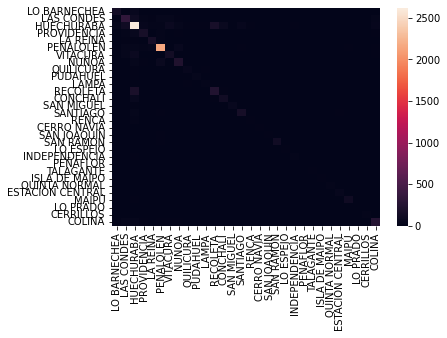

In [306]:
sns.heatmap(matrix, 
        xticklabels=matrix.columns,
        yticklabels=matrix.columns)